This is my project on the credit card default dataset. I hope you enjoy!

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file 
credit = pd.read_csv("UCI_Credit_Card.csv")

In [4]:
#Let's see what our values look like
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
#Approximately 22% will default on payments
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
print(credit.shape)

(30000, 25)


In [7]:
credit["default.payment.next.month"].value_counts()
#So our target values are 0 or 1-1 default and 0 not default...It means 6636 will default on their payment

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

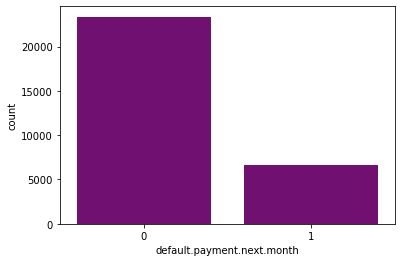

In [9]:
sns.countplot(x = credit["default.payment.next.month"], data=credit, color='purple')

In [10]:
credit.corr();
#Default payment has the highest correlation with Payment due last month
#This makes sense because if the payment was delayed then they will default
#It had lowest correlation with bill amounts. This means that the amount due does is not necessarily a good indicator 
#of defaulting or not

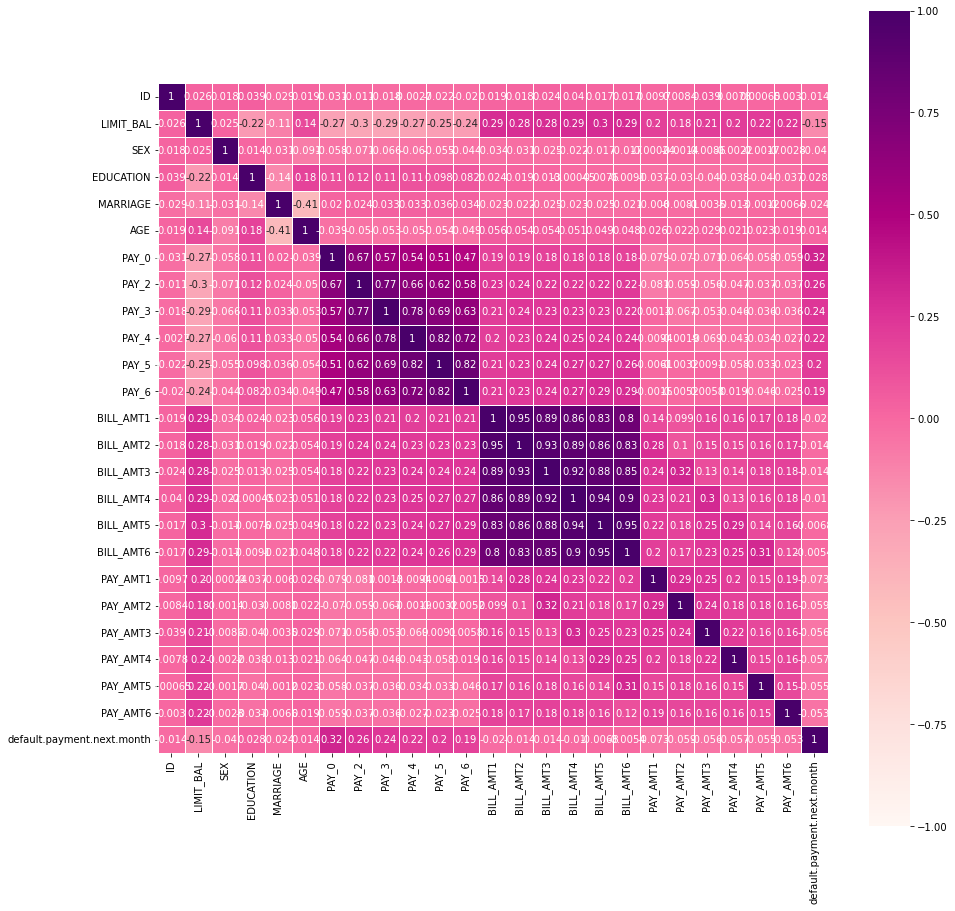

In [11]:
#This is a visualization of the correlation
#now we can obviously see that whether or not payment was delayed in prior months as really high correlation to defaulting
crn=credit.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(crn, annot=True,cmap="RdPu", vmin = -1, vmax=1, ax=ax, square=True, linewidths=.5,)
plt.show();

In [95]:
#I need to see the values that I am working with. From this we see that there are no null values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [96]:
#Just to make sure there are no null values
credit.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Length: 30000, dtype: int64

In [3]:
#I want to use manipulate my data without changing it so I created a copy of my dataset
#I want to drop duplicates and the shape of the copied dataset indicates there were no duplicates
Credit= credit.copy()
Credit.drop_duplicates()
print (Credit.shape)

(30000, 25)


In [4]:
#I want to drop the ID column
Credit.drop(["ID"], axis=1,inplace=True);

In [5]:
#Renaming for better reference
Credit["Default"] =Credit ["default.payment.next.month"]
Credit.drop(["default.payment.next.month"],axis=1, inplace=True)
Credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [100]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
Credit["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [6]:
#Let us regroup the marriage column and rename the values
Credit.loc[Credit.MARRIAGE==0, "MARRIAGE"] = 3
Credit.replace({ "MARRIAGE" : {1 : 'Married', 2 : 'Single', 3 : 'Other'}},inplace=True)
Credit.MARRIAGE.value_counts()

Single     15964
Married    13659
Other        377
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

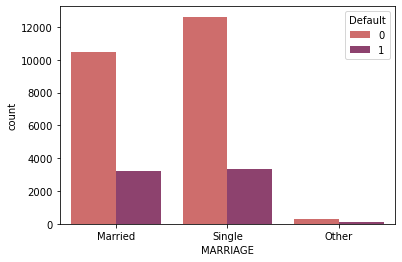

In [97]:
#From our graph, it seems that single individuals are less likely to default than married individuals
sns.countplot(x = Credit["MARRIAGE"], hue = Credit['Default'], palette='flare')

In [107]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
Credit["EDUCATION"].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
#Regrouping and renaming
Credit.loc[(Credit["EDUCATION"]==5)| (Credit["EDUCATION"]==6) |(Credit["EDUCATION"]==0),"EDUCATION"] = 4
Credit.replace({ "EDUCATION" : {1 :"Graduate school" , 2 : "University", 3 : "High school", 4:"Other"}},inplace=True)
Credit.EDUCATION.value_counts()

University         14030
Graduate school    10585
High school         4917
Other                468
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

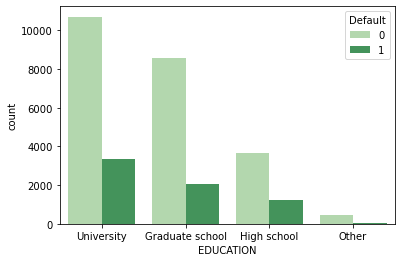

In [99]:
#University graduates are way less likely to default than others
sns.countplot(x = Credit["EDUCATION"], hue = Credit['Default'],palette='Greens')

In [8]:
#For seamlessness
Credit["PAY_1"]=Credit["PAY_0"]
Credit.drop(["PAY_0"],axis=1, inplace=True)
Credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,PAY_1
0,20000.0,2,University,Married,24,2,-1,-1,-2,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
1,120000.0,2,University,Single,26,2,0,0,0,2,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,-1
2,90000.0,2,University,Single,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,University,Married,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,University,Married,57,0,-1,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,High school,Married,39,0,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0
29996,150000.0,1,High school,Single,43,-1,-1,-1,0,0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-1
29997,30000.0,1,University,Single,37,3,2,-1,0,0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,4
29998,80000.0,1,High school,Married,41,-1,0,0,0,-1,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1


In [9]:
#Grouping bill amounts into 3
Credit["Recent_TwoBills"] = Credit["BILL_AMT1"] + Credit["BILL_AMT2"]
Credit[["Recent_TwoBills", "Default"]].groupby(['Recent_TwoBills']).mean()

Credit["Previous_TwoBills"] = Credit["BILL_AMT3"] + Credit["BILL_AMT4"] 
Credit[["Previous_TwoBills", "Default"]].groupby(['Previous_TwoBills']).mean()

Credit["First_TwoBills"] = Credit["BILL_AMT5"] + Credit["BILL_AMT6"] 
Credit[["First_TwoBills", "Default"]].groupby(['First_TwoBills']).mean()

Credit.drop(["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"], axis=1,inplace=True)
Credit;

In [10]:
Credit["Recent_PayAmt"] = Credit["PAY_AMT1"] + Credit["PAY_AMT2"] 
Credit[["Recent_PayAmt", "Default"]].groupby(['Recent_PayAmt']).mean()

Credit["Previous_PayAmt"] = Credit["PAY_AMT3"] + Credit["PAY_AMT4"] 
Credit[["Previous_PayAmt", "Default"]].groupby(['Previous_PayAmt']).mean()

Credit["First_PayAmt"] = Credit["PAY_AMT5"] +  Credit["PAY_AMT6"]
Credit[["First_PayAmt", "Default"]].groupby(['First_PayAmt']).mean()

Credit.drop(["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"], axis=1,inplace=True)

Credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Default,PAY_1,Recent_TwoBills,Previous_TwoBills,First_TwoBills,Recent_PayAmt,Previous_PayAmt,First_PayAmt
0,20000.0,2,University,Married,24,2,-1,-1,-2,-2,1,2,7015.0,689.0,0.0,689.0,0.0,0.0
1,120000.0,2,University,Single,26,2,0,0,0,2,1,-1,4407.0,5954.0,6716.0,1000.0,2000.0,2000.0
2,90000.0,2,University,Single,34,0,0,0,0,0,0,0,43266.0,27890.0,30497.0,3018.0,2000.0,6000.0
3,50000.0,2,University,Married,37,0,0,0,0,0,0,0,95223.0,77605.0,58506.0,4019.0,2300.0,2069.0
4,50000.0,1,University,Married,57,0,-1,0,0,0,0,-1,14287.0,56775.0,38277.0,38681.0,19000.0,1368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,High school,Married,39,0,0,0,0,0,0,0,381763.0,296369.0,47217.0,28500.0,8050.0,6000.0
29996,150000.0,1,High school,Single,43,-1,-1,-1,0,0,0,-1,3511.0,12481.0,5190.0,5363.0,9127.0,0.0
29997,30000.0,1,University,Single,37,3,2,-1,0,0,1,4,6921.0,23636.0,39939.0,0.0,26200.0,5100.0
29998,80000.0,1,High school,Married,41,-1,0,0,0,-1,1,1,76734.0,129078.0,60799.0,89309.0,3104.0,54768.0


In [11]:
Credit.replace({ "SEX" : {1 :"Male" , 2 : "Female"}},inplace=True)
Credit.SEX.value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

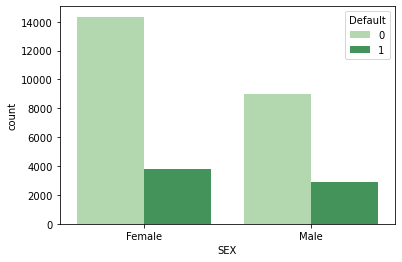

In [29]:
sns.countplot(x = Credit["SEX"], hue = Credit['Default'],palette='Greens')

In [12]:
#Again copying not to change  the data
NewCred=Credit.copy()
NewCred.head();

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



In [14]:
numeric_features = ["Recent_TwoBills","Previous_TwoBills","First_TwoBills","AGE","LIMIT_BAL", "Recent_PayAmt","Previous_PayAmt",
                  "First_PayAmt"] 
numeric_transformer=Pipeline([
    ('scaler',StandardScaler())])
    

categorical_features = ["SEX","EDUCATION","MARRIAGE","PAY_1","PAY_2","PAY_3", "PAY_4", "PAY_5","PAY_6"] 
categorical_transformer = Pipeline([
     ('hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer,numeric_features),
        ('cat', categorical_transformer, categorical_features)])




In [15]:
X = preprocessor.fit_transform(NewCred.drop(columns=["Default"]))

y = NewCred["Default"]

In [16]:
XTrain, XTest, yTrain, yTest = train_test_split(X,y, test_size = 0.25, random_state = 42) 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

my_search = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy',cv=5)
my_search.fit(XTrain,yTrain )

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [18]:
print(my_search.best_params_)

{'C': 1, 'penalty': 'l2'}


In [19]:
print(my_search.best_score_)

0.8207111111111111


In [20]:
optimal_classifier=my_search.best_estimator_

In [21]:
#Predicted probability
train_pred=optimal_classifier.predict_proba(XTrain)[:,1]
test_pred=optimal_classifier.predict_proba(XTest)[:,1]

#Predicted class
TrPred=optimal_classifier.predict(XTrain)
TePred=optimal_classifier.predict(XTest)

In [22]:
#82% accuracy on training data
#81.8% accuracy on testing data

from sklearn.metrics import accuracy_score
training_accuracy=accuracy_score(TrPred,yTrain)
testing_accuracy=accuracy_score(TePred,yTest)
print(training_accuracy)
print(testing_accuracy)

0.822
0.8185333333333333


In [23]:
from sklearn.metrics import classification_report
print(classification_report(yTest,TePred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.34      0.45      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500



In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yTest, TePred))

[[5585  288]
 [1073  554]]


<AxesSubplot:>

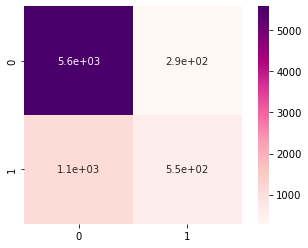

In [83]:
conf=confusion_matrix(yTest, TePred)
sns.heatmap(conf,square=True, annot=True,cmap="RdPu")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42) 

In [26]:
from sklearn.svm import SVC
classifier=SVC(probability=True)
classifier.fit(X_train,y_train)

SVC(probability=True)

In [27]:
#Predicted probability
#trainPred=classifier.predict_proba(X_Train)[:,1]
#testPred=classifier.predict_proba(X_Test)[:,1]

#Predicted class
Tr_Pred=classifier.predict(X_train)
Te_Pred=classifier.predict(X_test)

In [28]:

trainaccuracy=accuracy_score(Tr_Pred,y_train)
testaccuracy=accuracy_score(Te_Pred,y_test)
print(trainaccuracy)
print(testaccuracy)

0.8253333333333334
0.8209333333333333


In [29]:
print(confusion_matrix(y_test, Te_Pred))

[[5626  247]
 [1096  531]]


<AxesSubplot:>

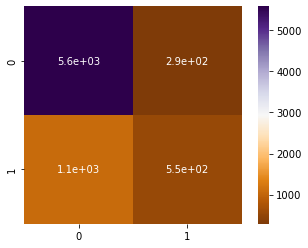

In [124]:
confusion=confusion_matrix(yTest, TePred)
sns.heatmap(confusion,square=True, annot=True,cmap="PuOr")

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Te_Pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5873
           1       0.68      0.33      0.44      1627

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.67      7500
weighted avg       0.80      0.82      0.80      7500



In [34]:
from sklearn.model_selection import cross_val_predict
model=LogisticRegression()
y_scores = cross_val_predict(model, XTrain, yTrain, cv=3,method="decision_function")

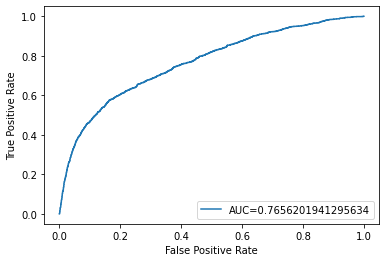

In [125]:
#Let's calculate AUC
#Our AUC is 0.76 which means our Logistic model does a good job of classifying our data
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yTest,test_pred )
auc=metrics.roc_auc_score(yTest,test_pred )
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve


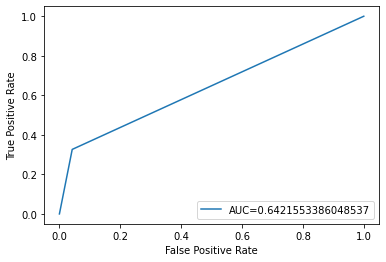

In [127]:
#Our AUC is 0.64 which is a simialr result to Random Forest but not as good as the Logistic model
Sfpr,Stpr,_=metrics.roc_curve(y_test,Te_Pred )
auc=metrics.roc_auc_score(y_test,Te_Pred )
plt.plot(Sfpr,Stpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()